# What is Groupby in Pandas?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.DataFrame(
    {"key1":list("aabbab"),
     "key2":["one","two","three"]*2,
     "data1":np.random.randn(6),
     "data2":np.random.randn(6)})
df

,key1,key2,data1,data2
0,a,one,-0.286903,-0.393563
1,a,two,-0.310975,0.174902
2,b,three,-0.508983,0.664556
3,b,one,1.345086,1.115325
4,a,two,-2.035911,-0.394063
5,b,three,0.323321,-0.912262


In [3]:
group=df["data1"].groupby(df["key1"])

In [4]:
group

In [5]:
group.mean()

key1
a   -0.877930
b    0.386475
Name: data1, dtype: float64

In [6]:
ave=df["data1"].groupby([df["key1"],
                         df["key2"]]).mean()
ave

key1  key2 
a     one     -0.286903
      two     -1.173443
b     one      1.345086
      three   -0.092831
Name: data1, dtype: float64

In [7]:
ave.unstack()

key2,one,three,two
key1,,,
a,-0.286903,NaN,-1.173443
b,1.345086,-0.092831,NaN


In [8]:
df.groupby("key1").mean()

TypeError: Could not convert onetwotwo to numeric

In [ ]:
df.groupby(["key1","key2"]).mean()

## Iterating over Groups

In [9]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.286903 -0.393563
1    a  two -0.310975  0.174902
4    a  two -2.035911 -0.394063
b
  key1   key2     data1     data2
2    b  three -0.508983  0.664556
3    b    one  1.345086  1.115325
5    b  three  0.323321 -0.912262


In [10]:
for (x1,x2),group in df.groupby(["key1",
                                 "key2"]):
    print(x1,x2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.286903 -0.393563
a two
  key1 key2     data1     data2
1    a  two -0.310975  0.174902
4    a  two -2.035911 -0.394063
b one
  key1 key2     data1     data2
3    b  one  1.345086  1.115325
b three
  key1   key2     data1     data2
2    b  three -0.508983  0.664556
5    b  three  0.323321 -0.912262


In [11]:
piece=dict(list(df.groupby("key1")))

In [12]:
piece["a"]

,key1,key2,data1,data2
0,a,one,-0.286903,-0.393563
1,a,two,-0.310975,0.174902
4,a,two,-2.035911,-0.394063


## Selecting a Column or Subset of Columns

In [13]:
df.groupby(['key1', 
            'key2'])[['data1']].mean()

data1
key1 key2           
a    one   -0.286903
     two   -1.173443
b    one    1.345086
     three -0.092831

## Grouping with Dicts and Series

In [14]:
fruit=pd.DataFrame(np.random.randn(4,4),
                   columns=list("abcd"),
                   index=["apple","cherry",
                          "banana","kiwi"])
fruit

,a,b,c,d
apple,0.241123,0.188513,1.323343,1.329435
cherry,-0.966745,0.318600,1.441521,-0.420444
banana,0.047928,0.160250,0.297107,-0.173266
kiwi,-1.414283,0.232251,1.096464,-2.417220


In [15]:
label={"a": "green","b":"yellow",
       "c":"green","d":"yellow",
       "e":"purple"}

In [16]:
group=fruit.groupby(label,axis=1)

In [17]:
group.sum()

,green,yellow
apple,1.564467,1.517948
cherry,0.474776,-0.101844
banana,0.345035,-0.013015
kiwi,-0.317819,-2.184969


In [18]:
s=pd.Series(label)
s

a     green
b    yellow
c     green
d    yellow
e    purple
dtype: object

In [19]:
fruit.groupby(s,axis=1).count()

,green,yellow
apple,2,2
cherry,2,2
banana,2,2
kiwi,2,2


## Grouping with Functions

In [20]:
fruit.groupby(len).sum()

,a,b,c,d
4,-1.414283,0.232251,1.096464,-2.417220
5,0.241123,0.188513,1.323343,1.329435
6,-0.918817,0.478850,1.738627,-0.593709


## Grouping by Index Levels

In [21]:
data=pd.DataFrame(np.random.randn(4,5),
                  columns=[list("AAABB"),
                           [1,2,3,1,2]])

In [22]:
data.columns.names=["letter","number"]
data

letter         A                             B          
number         1         2         3         1         2
0      -1.066722  0.986929 -0.683262  0.147756  1.056305
1       0.519874 -0.355320  0.061809 -0.386019 -0.284270
2      -0.657781  0.492635 -0.183984  1.756095  1.231200
3      -1.595368 -0.294752  1.195662  0.447055  1.239426

In [23]:
data.groupby(level="letter",axis=1).sum()

letter,A,B
0,-0.763055,1.204061
1,0.226364,-0.670289
2,-0.349130,2.987295
3,-0.694457,1.686481


## Application with Real Data Set 

In [26]:
game=pd.read_csv("DataSets/vgsalesGlobale.csv")

In [27]:
game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [28]:
game.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [29]:
game.dropna().describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [30]:
game.Global_Sales.mean()

0.5374406555006628

In [31]:
group=game.groupby("Genre")

In [32]:
group["Global_Sales"].count()

Genre
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
Name: Global_Sales, dtype: int64

In [33]:
group["Global_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,3316.0,0.528100,1.156427,0.01,0.07,0.190,0.5000,21.40
Adventure,1286.0,0.185879,0.513280,0.01,0.02,0.060,0.1600,11.18
Fighting,848.0,0.529375,0.955965,0.01,0.08,0.210,0.5500,13.04
Misc,1739.0,0.465762,1.314886,0.01,0.06,0.160,0.4100,29.02
Platform,886.0,0.938341,2.585254,0.01,0.09,0.280,0.7900,40.24
Puzzle,582.0,0.420876,1.561716,0.01,0.04,0.110,0.3075,30.26
Racing,1249.0,0.586101,1.662437,0.01,0.07,0.190,0.5300,35.82
Role-Playing,1488.0,0.623233,1.707909,0.01,0.07,0.185,0.5225,31.37
Shooter,1310.0,0.791885,1.817263,0.01,0.08,0.230,0.7275,28.31


In [34]:
game[game.Genre=="Action"].Global_Sales.mean()

0.5281001206272617

In [35]:
%matplotlib inline

<Axes: xlabel='Genre'>

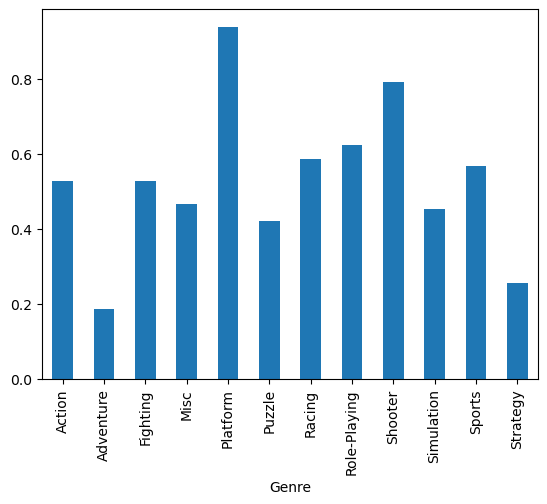

In [36]:
group["Global_Sales"].mean().plot(kind="bar")

<Axes: xlabel='Genre'>

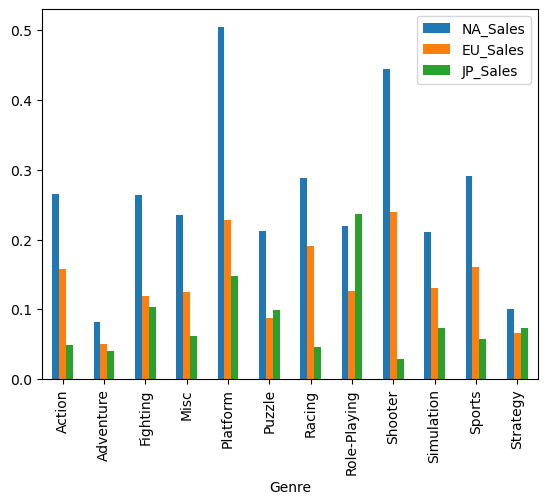

In [37]:
group[["NA_Sales",
       "EU_Sales",
       "JP_Sales"]].mean().plot(kind="bar")